# Image Processing Tutorial

### What is Image

we can treat image as a nd numpy array.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
from facenet_pytorch import MTCNN, InceptionResnetV1, extract_face
from torchvision.transforms import ToTensor

/home/devildev/.local/share/miniconda3/envs/nlp/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [ ]:
!wget "https://raw.githubusercontent.com/deba-iitbh/DS210/main/image_path.png"
!wget "https://raw.githubusercontent.com/deba-iitbh/DS210/main/image_path.png"
!wget "https://raw.githubusercontent.com/deba-iitbh/DS210/main/img.png"
!wget "https://github.com/deba-iitbh/DS210/raw/main/5-celebrity-faces-dataset.npz"

In [4]:
img=cv2.imread("image_path.png")

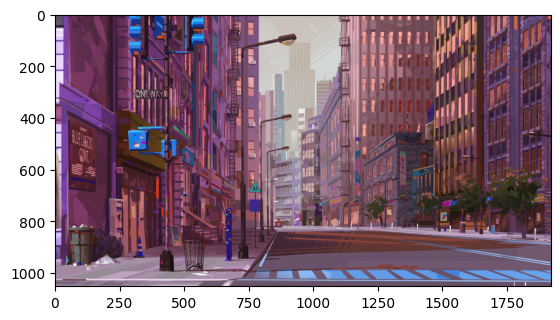

In [5]:
plt.imshow(img)

In [58]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

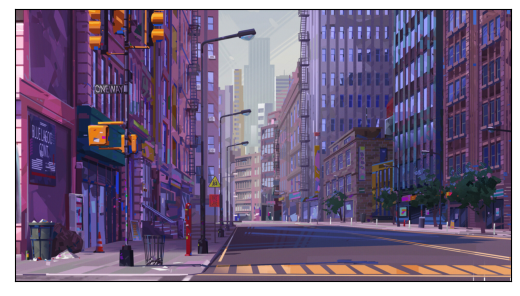

In [59]:
plt.imshow(img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [60]:
#grey scale image

In [63]:
gimg=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

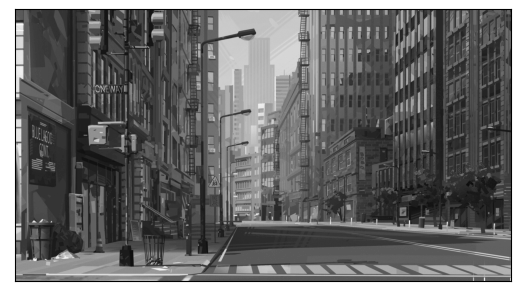

In [64]:
plt.imshow(gimg,cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [18]:
#Image cropping

In [65]:
img.shape

(1052, 1920, 3)

In [66]:
y=0
x=0
h=900
w=510
crop_image = img[x:w, y:h]

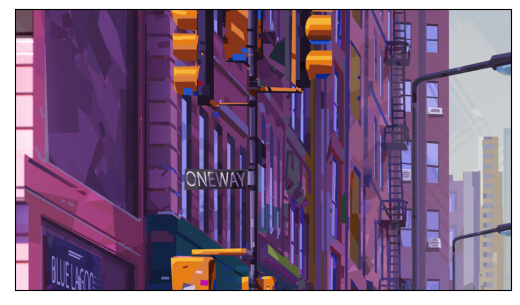

In [67]:
plt.imshow(crop_image)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [68]:
#Image resize

In [69]:
res_img=cv2.resize(img, (1500, 900))

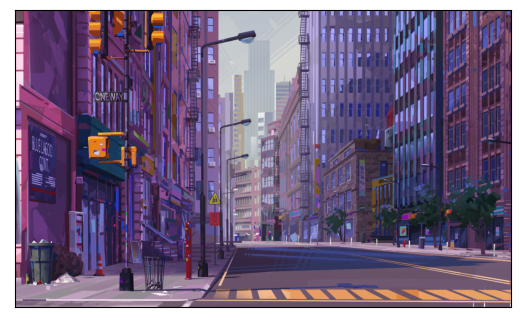

In [70]:
plt.imshow(res_img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [71]:
#Rotate image

In [72]:
rotated_image=cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

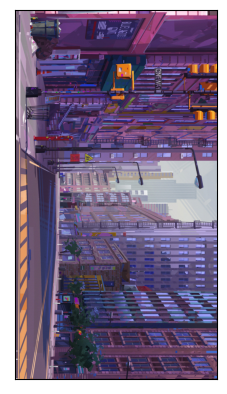

In [73]:
plt.imshow(rotated_image)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [74]:
#Fourier Transform of image

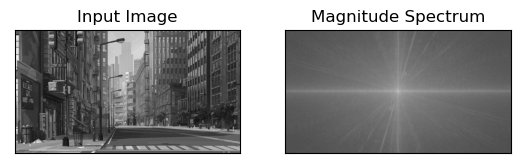

In [75]:
img = cv2.imread('image_path.png', cv2.IMREAD_GRAYSCALE)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

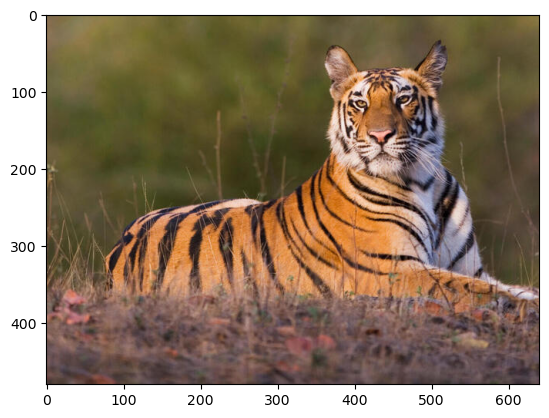

In [76]:
img=cv2.imread('img.png')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

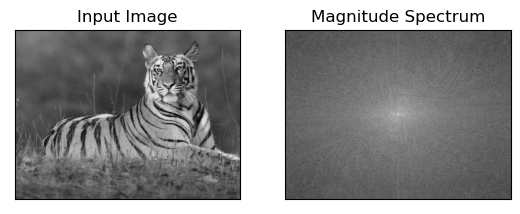

In [78]:
img = cv2.imread('img.png', cv2.IMREAD_GRAYSCALE)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [80]:
#low pass filter

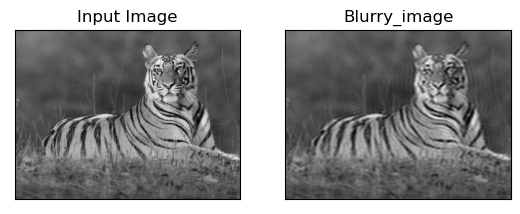

In [81]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-50:crow+50, ccol-50:ccol+50] = 1
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Blurry_image'), plt.xticks([]), plt.yticks([])
plt.show()

In [82]:
#high pass filter

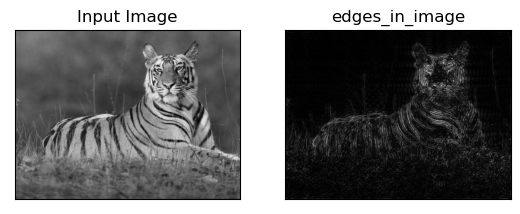

In [83]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
# create a mask first, center square is 1, remaining all zeros
mask = np.ones((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 0
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('edges_in_image'), plt.xticks([]), plt.yticks([])
plt.show()

In [84]:
#Resize using freq spectrum

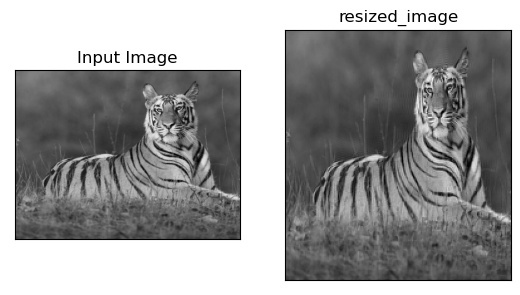

In [89]:
fshift = dft_shift[crow-100:crow+100, ccol-90:ccol+90]
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('resized_image'), plt.xticks([]), plt.yticks([])
plt.show()

In [90]:
print(img.shape,img_back.shape)

(480, 640) (200, 180)


In [91]:
#Blurr detection

In [92]:
def ImgisClear(image_path, threshold = 200):
    img=cv2.imread(image_path)
    if img is None:
        return False
    print("variance is",cv2.Laplacian(img, cv2.CV_64F).var())
    return cv2.Laplacian(img, cv2.CV_64F).var() > threshold

In [101]:
img = cv2.imread('img.png', cv2.IMREAD_GRAYSCALE)

# Apply Laplacian filter
laplacian = cv2.Laplacian(img, cv2.CV_64F)

In [102]:
ImgisClear("image_path.png")

550.5188669833342


True

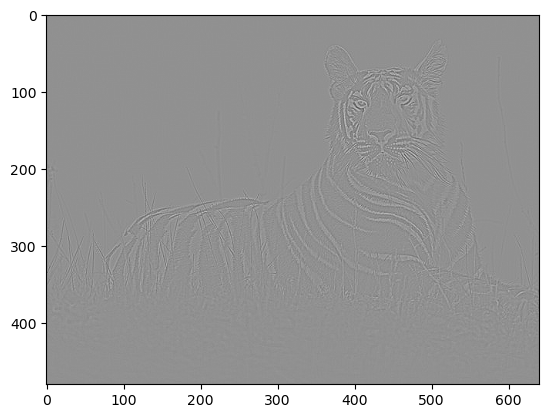

In [104]:
plt.imshow(laplacian,cmap="gray")

In [105]:
blur = cv2.GaussianBlur(img, (5, 5), 8)

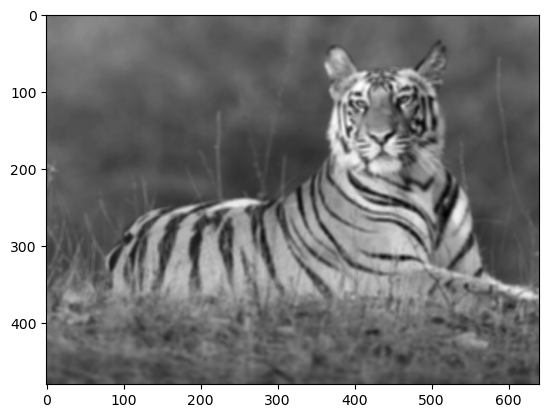

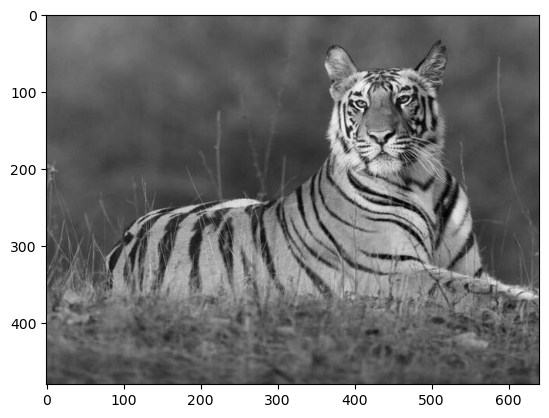

In [108]:
plt.imshow(blur,cmap="gray")
plt.show()
plt.imshow(img,cmap="gray")

In [46]:
#Classification

In [47]:
data = np.load('5-celebrity-faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

Loaded:  (90, 160, 160, 3) (90,) (25, 160, 160, 3) (25,)


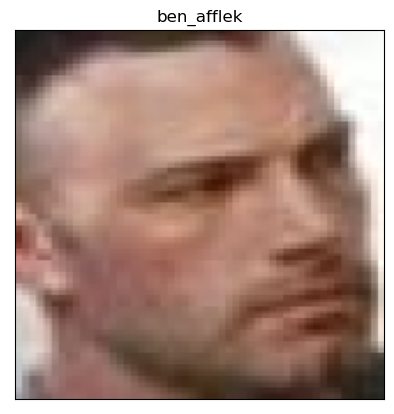

In [48]:
plt.imshow(trainX[50])
plt.title(trainy[50])
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [49]:
def emb(trainX,trainy,testX,testy):
    device="cpu"
    resnet = InceptionResnetV1(pretrained='casia-webface', device=device).eval()
    tf_img = lambda i: ToTensor()(i).unsqueeze(0).float()
    embeddings = lambda input: resnet(input)

    # convert each face in the train set into embedding
    emdTrainX = list()
    for face in trainX:
        #mean, std = face.mean(), face.std()
        #face = (face-mean)/std
        face=face/255
        t = tf_img(face).to(device)
        emd = embeddings(t).squeeze().cpu().tolist()
        emdTrainX.append(emd)
        #print(len(emd))

    emdTrainX = np.asarray(emdTrainX)
    print(emdTrainX.shape)

    # convert each face in the test set into embedding
    emdTestX = list()
    for face in testX:
        mean, std = face.mean(), face.std()
        #face = (face-mean)/std
        face=face/255
        t = tf_img(face).to(device)
        emd = embeddings(t).squeeze().cpu().tolist()
        emdTestX.append(emd)
    emdTestX = np.asarray(emdTestX)
    print(emdTestX.shape)

    # save arrays to one file in compressed format
    np.savez_compressed('5-celebrity-faces-embeddings.npz', emdTrainX, trainy, emdTestX, testy)

In [50]:
emb(trainX,trainy,testX,testy)

  0%|          | 0.00/111M [00:00<?, ?B/s]

(90, 512)
(25, 512)


In [51]:
data=np.load("5-celebrity-faces-embeddings.npz")
emdTrainX, trainy, emdTestX, testy=data["arr_0"],data["arr_1"],data["arr_2"],data["arr_3"]

In [52]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy_enc = out_encoder.transform(trainy)
testy_enc = out_encoder.transform(testy)
model = SVC(kernel='linear', probability=True)
model.fit(emdTrainX, trainy_enc)
# predict
yhat_train = model.predict(emdTrainX)
yhat_test = model.predict(emdTestX)
# score
score_train = accuracy_score(trainy_enc, yhat_train)
score_test = accuracy_score(testy_enc, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Accuracy: train=100.000, test=100.000
